# Exercises 08
In the following exercise we numerically solve a quantum problem in 1D. Our task is to find the ground state wavefunction, and its energy, of the potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$
We adopt a variational method, namely we look among the family of functions 
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

 for the wave-function that minimizes the energy $
\langle {\hat H} \rangle_T$ .

### Preiminary test
Before getting to the exercises, the Metropolis algorythm is set by fixing the proper parameters such as starting point and uniform distribution step. The algorythm is set for $|\Psi^{\mu,\sigma}_T(x)|^2$ with $\mu=0.8, \sigma=0.6$. Since during the exercises $\mu$ and $\sigma$ will not vary that much we expect that the set parameters will be fine for every $\mu$ and $\sigma$ we will use.  Moreover, by looking at Figure 1, an estimate of how many points are required for a satisfactory sampling is also given. We see that after at least 100000 points, a good correspondence between hystogram and target distribution comes out.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d


def psi2_mu_sigma(x, b_mu, b_sigma):
    a_exp= 0.5*pow((x-b_mu)/b_sigma, 2);
    b_exp= 0.5*pow((x+b_mu)/b_sigma, 2);
    I=2*(1+np.exp(-b_mu**2/b_sigma**2))*b_sigma*np.sqrt(np.pi)

    return (np.exp(-a_exp)+np.exp(-b_exp))**2/I;



def plot_distr(arr, n, f):
    
    if(n<=arr.size):
        a=np.arange(n)
        arr=np.resize(arr,n)
        
    
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(projection='3d')
    nbins = 100
    ys = arr


    hist, bins = np.histogram(ys, bins=nbins, density='True')
    xs = (bins[:-1] + bins[1:])/2
    dx=bins[1]-bins[0]

    obj1=ax.bar(xs, hist, width=dx, zdir='y', alpha=0.8)
    obj1.set_label('computed')

    ax.set_xlabel('r value')
    ax.set_ylabel('# step')
    ax.set_zlabel('occurences')
    ax.invert_xaxis()
    ax.view_init(30, 40)

    yr=np.arange(n)
    zr=np.zeros(n)
    ax.plot(arr, yr, zr)
    
    r=np.linspace(-2.5,2.5, 200)
    yr=np.ones(r.size)*0
    obj2,=ax.plot(r, yr, f(r),'r')
    obj2.set_label('expected')
    
    ax.set_title(r'Figure 1: $|\Psi^{\mu,\sigma}_T(x)|^2$ test sampling')
    ax.legend(loc=1)

    plt.show()





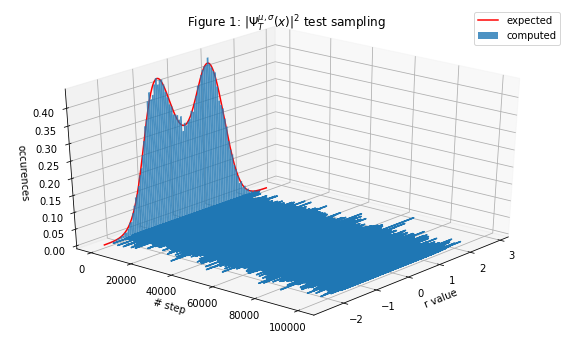

In [2]:
x_values= np.loadtxt('test.dat', usecols=(0), delimiter=' ', unpack='true')
n_points=100000
def psi2_test(x):
    return psi2_mu_sigma(x,0.8,0.6);


plot_distr(x_values, n_points, psi2_test)


### Exercise 08.1
We now vary the parameters $\sigma$ and $\mu$ and compute the average energy for every $|\Psi^{\mu,\sigma}_T(x)|^2$. After some trial runs, we decide to take 10000 $(\sigma,\mu)$ pairs, with $\sigma$ in the range [0.6,0.63] and $\mu$ in the range [0.79,0.82]. Every energy estimation is done with 100000 points sampled from the probability distribution $|\Psi^{\mu,\sigma}_T(x)|^2$.
The energy estimation consists in evaluating the following integral:
$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

where ($\hbar = 1$ and $m=1$ are used)
    
$$
\frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}=\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$


According to the variational method, the best approximating wavefunction of the form $|\Psi^{\mu,\sigma}_T(x)|^2$ is the one that gives the lower energy. The best parameters are given below.

In [3]:
from mpl_toolkits import mplot3d

mu, sigma, ene= np.loadtxt('energy_mu_sigma.dat', unpack='true')

best mu = 0.8113
best sigma = 0.6168
energy minimum = -0.449954


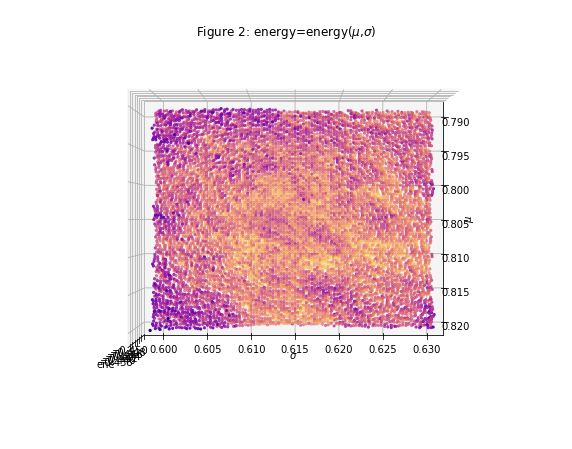

In [4]:
fig,ax=plt.subplots(1,1, figsize=(10,8))
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
ax.scatter3D(mu, sigma, ene, c=-ene, marker='.', cmap='plasma')
ax.view_init(90, 0)
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('ene');
ax.set_title('Figure 2: energy=energy($\mu$,$\sigma$)')

_min=min(ene)
idx=np.argmin(ene)
print(rf'best mu = {mu[idx]}')
print(rf'best sigma = {sigma[idx]}')
print(rf'energy minimum = {_min}')

### Exercise 08.2
We now compute through data blocking the progressive average for the best estimation of the ground state energy (figure 3).
1000 blocks are used with size 10000 for a total of 1000000 points.
In figure 4 we plot the best wave-function and we compare it with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation.

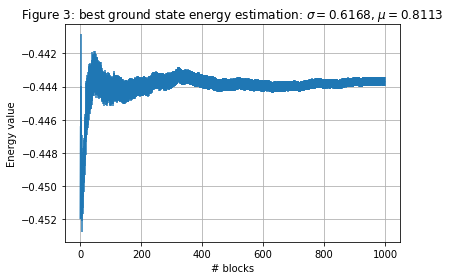

best energy= -0.4437 +- 0.00026407


In [5]:
prog_av, error = np.loadtxt('energy_best_ave.dat', usecols=(0,1), delimiter=' ', unpack='true')
x=np.arange(prog_av.size)

plt.title(rf'Figure 3: best ground state energy estimation: $\sigma={sigma[idx]}$, $\mu={mu[idx]}$')
plt.ylabel('Energy value')
plt.xlabel('# blocks')
plt.errorbar(x,prog_av,yerr=error)
plt.grid(True)
plt.show()

print(f'best energy= {prog_av[x.size-1]} +- {error[x.size-1]}')

plt.show()

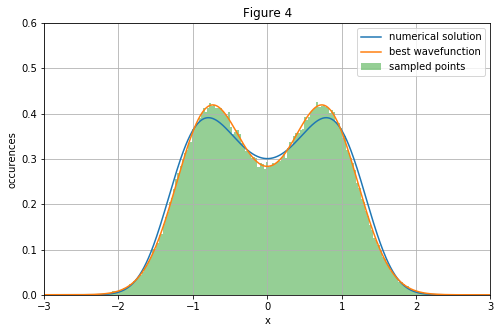

In [6]:
from scipy.integrate import quad

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

#print("Ground state energy: ", E[0])
#print("1st excited state energy: ", E[1])
#print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
plt.plot(x,(psi[0])**2)

psi2 = psi2_mu_sigma(x, b_mu=0.8002, b_sigma=0.6132)
plt.plot(x, psi2)

plt.xlabel("x")
plt.ylabel('occurences')
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0,0.6))

n=1000000               #max 10.000.000
x_values= np.loadtxt('psi2.dat', usecols=(0), delimiter=' ', unpack='true', max_rows=n)
plt.hist(x_values, bins=200, density=True, alpha=0.5)
plt.legend(['numerical solution','best wavefunction','sampled points'])
plt.title('Figure 4')
plt.show()

### Extra
As a final extra exercise, let's try a different method to find the best parameters for $|\Psi^{\mu,\sigma}_T(x)|^2$ by simply fitting the numerical solution. As before, we can compute the associated ground state energy. Even if at first sight the fitted function seems more similar to the numerical solution compared to the wavefunction found before, the energy is a bit higher and hence it is a worse approximation of the ground state energy we are looking for.

best parameters from fit [0.82855241 0.64951924]


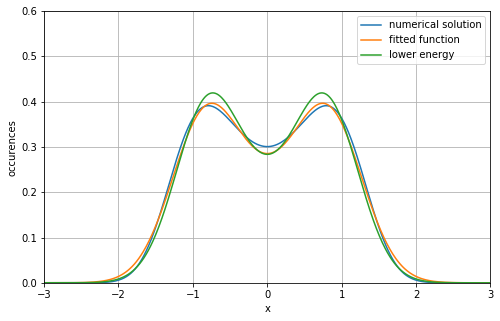

In [7]:
x_data = x
y_data = psi[0]**2

from scipy import optimize
def test_func(x, b_mu, b_sigma):
    a_exp= 0.5*pow((x-b_mu)/b_sigma, 2);
    b_exp= 0.5*pow((x+b_mu)/b_sigma, 2);
    I=2*(1+np.exp(-b_mu**2/b_sigma**2))*b_sigma*np.sqrt(np.pi)

    return (np.exp(-a_exp)+np.exp(-b_exp))**2/I;


params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[0.8, 0.6])

print(f'best parameters from fit {params}')

plt.figure(figsize=(8, 5))
plt.plot(x_data, y_data, label='numerical solution')
plt.plot(x_data, test_func(x_data, params[0], params[1]),label='fitted function')
psi2 = psi2_mu_sigma(x, b_mu=0.8002, b_sigma=0.6132)
plt.plot(x, psi2, label='lower energy')


plt.xlabel("x")
plt.ylabel('occurences')
plt.legend(loc='best')
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((0,0.6))

plt.show()

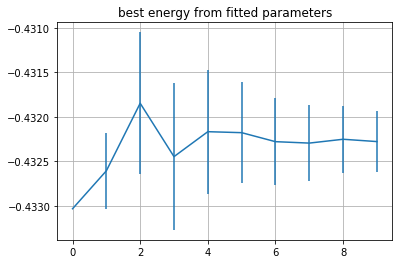

In [8]:
prog_av, error = np.loadtxt('energy_ave_fit.dat', usecols=(0,1), delimiter=' ', unpack='true')
x=np.arange(prog_av.size)

plt.title('best energy from fitted parameters')
plt.errorbar(x,prog_av,yerr=error)
plt.grid(True)
plt.show()